# Notebook error analysis 

## Refining error types - Vectorization and clustering method selection


use a subset of whole GitHub error dataset (PL=python) --> ename == valueerror

### 1. Preprocess the whole dataset - tokenize

In [1]:
import pandas as pd 
import cluster_util

df2_err = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4.xlsx')
df2_err['evalue_tokenized'] = df2_err['evalue'].apply(cluster_util.preprocess_text)

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df2_err = df2_err.reindex(columns=['fname', 'ename', 'evalue', 'evalue_tokenized', 'traceback', 'lib'])
df2_err.to_excel("C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4_evaluetokenized.xlsx", index=False, engine='xlsxwriter')

### 2. Clustering value errors

load tokenized error dataset, evalue_tokenized

In [1]:
import pandas as pd 
import cluster_util

df2_err = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4_evaluetokenized.xlsx')
df2_err_ename = df2_err[df2_err['ename']=='valueerror']
err_descs = df2_err_ename['evalue_tokenized'].values.astype('U')

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2.1 Vectorization
##### 1. tfidf
too high dimension (18148, 7791)

In [2]:
X_tfidf = cluster_util.vectorizer_tfidf(err_descs)
X_tfidf.shape

(18143, 7649)

In [3]:
import numpy as np

with open('C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror/nberror_g_evalue_embeddings_tfidf.txt', 'wb') as f:
    np.save(f, X_tfidf)

##### 2. sentence transformers

https://github.com/UKPLab/sentence-transformers

https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

sentence to vector (18148, 384)

2 embeddings with different preprocessing

In [4]:
X_transformers = cluster_util.vectorizer_sentence2vec(err_descs)
X_transformers.shape

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


(18143, 384)

In [5]:
with open('C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror/nberror_g_evalue_embeddings_transformers.txt', 'wb') as f:
    np.save(f, X_transformers)

In [6]:
df2_err_ename['evalue_tokenized_transformer'] = df2_err_ename['evalue'].apply(cluster_util.preprocess_text_transformer)
err_descs1 = df2_err_ename['evalue_tokenized_transformer'].values.astype('U')

X_transformers1 = cluster_util.vectorizer_sentence2vec(err_descs1)

with open('C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror/nberror_g_evalue_embeddings_transformers_1.txt', 'wb') as f:
    np.save(f, X_transformers1)

C:\Users\yirwa29\AppData\Local\Temp\ipykernel_9420\3453668874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_err_ename['evalue_tokenized_transformer'] = df2_err_ename['evalue'].apply(cluster_util.preprocess_text_transformer)


##### 3. word embeddings - GloVe

Turn sentences to vectors via word embeddings by taking the mean/sum of all word embeddings of the sentence

using GloVe (18148, 200)

In [7]:
glove_vectors = cluster_util.load_glove("C:/Users/yirwa29/Downloads/Dataset-Nb/glove.6B/glove.6B.200d.txt")
X_glove = np.array([cluster_util.vectorizer_word2vec(xi, glove_vectors, 200) for xi in err_descs])
X_glove.shape

Loaded 400000 word vectors from GloVe.


(18143, 200)

In [8]:
with open('C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror/nberror_g_evalue_embeddings_glove.txt', 'wb') as f:
    np.save(f, X_glove)

In [9]:
df2_err_ename.to_excel("C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror/nberror_g_cluster_valueerror.xlsx", index=False, engine='xlsxwriter')

### 2.2 Clustering with vectorized error values


In [1]:
import pandas as pd
import numpy as np 
import cluster_util

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror'
path_file = path+"/nberror_g_cluster_valueerror.xlsx"

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 1. tfidf

In [2]:
df2_err_ename = pd.read_excel(path_file)
with open(path+'/nberror_g_evalue_embeddings_tfidf.txt', 'rb') as f:
    X_tfidf = np.load(f)

In [ ]:
## kmeans

In [2]:
K_range = range(1,100)
inertias = cluster_util.elbow_for_kmean(X_tfidf, K_range = K_range)

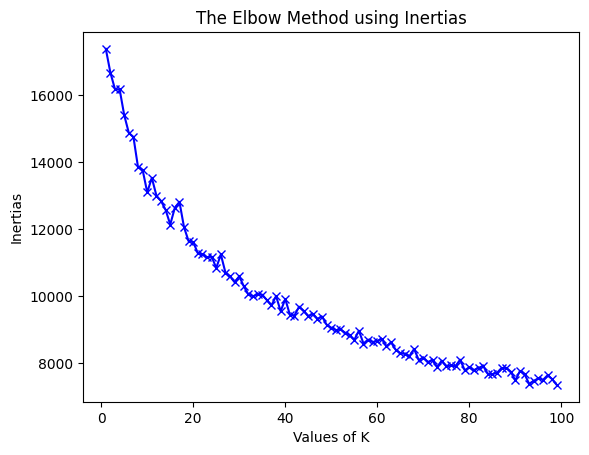

In [3]:
import matplotlib.pyplot as plt 

plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [3]:
num_clusters = 90
res = cluster_util.cluster_kmeans(X_tfidf, n_clusters=num_clusters)
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(num_clusters, df2_err_ename[['evalue','cluster']])

In [5]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_km_tfidf"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [ ]:
## dbscan

In [6]:
eps_tfidf = cluster_util.epsilon_search_dbscan(X_tfidf)
print(eps_tfidf)
res = cluster_util.cluster_dbscan(X_tfidf, eps=eps_tfidf, min_samples=30)

0.7166779443397623
Estimated no. of clusters: 83
Estimated no. of noise points: 7695


In [7]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [8]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_dbscan_tfidf"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [9]:
## OPTICS

In [10]:
res = cluster_util.cluster_optics(X_tfidf, min_samples = 30)

Estimated no. of clusters: 98
Estimated no. of noise points: 7584


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [11]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [12]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_optics_tfidf"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

##### 2. sentence transformers

In [13]:
df2_err_ename = pd.read_excel(path_file)
with open(path+'/nberror_g_evalue_embeddings_transformers.txt', 'rb') as f:
    X_transformers = np.load(f)
with open(path+'/nberror_g_evalue_embeddings_transformers_1.txt', 'rb') as f:
    X_transformers1 = np.load(f)

In [16]:
## kmeans

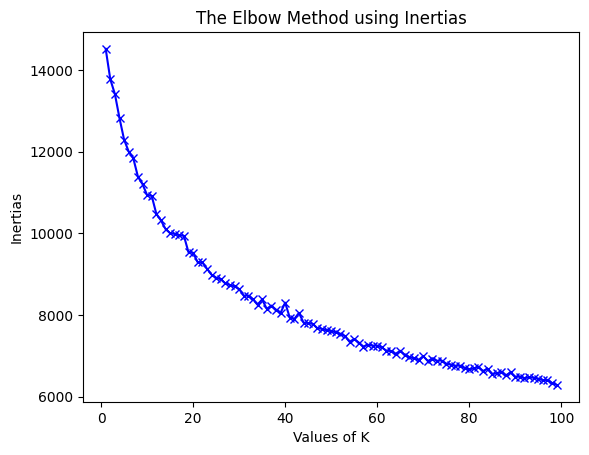

In [67]:
K_range = range(1,100)
inertias = cluster_util.elbow_for_kmean(X_transformers, K_range = K_range) # X_transformers1

import matplotlib.pyplot as plt 

plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [14]:
num_clusters = 90
res = cluster_util.cluster_kmeans(X_transformers, n_clusters=num_clusters)
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(num_clusters, df2_err_ename[['evalue','cluster']])

In [15]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_km_transformers"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [16]:
# transformer1
num_clusters = 90
res = cluster_util.cluster_kmeans(X_transformers1, n_clusters=num_clusters)
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(num_clusters, df2_err_ename[['evalue','cluster']])

In [17]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_km_transformers1"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [21]:
## dbscan

In [18]:
eps_transformers = cluster_util.epsilon_search_dbscan(X_transformers)
print(eps_transformers)
res = cluster_util.cluster_dbscan(X_transformers, eps=eps_transformers, min_samples=30)

0.6408108969235822
Estimated no. of clusters: 75
Estimated no. of noise points: 7387


In [19]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [20]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_dbscan_transformers"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [21]:
# transformer 1
eps_transformers1 = cluster_util.epsilon_search_dbscan(X_transformers1)
print(eps_transformers1)
res = cluster_util.cluster_dbscan(X_transformers1, eps=eps_transformers1, min_samples=30)

0.49826957613440065
Estimated no. of clusters: 67
Estimated no. of noise points: 9108


In [22]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [23]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_dbscan_transformers1"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [24]:
## OPTICS

In [25]:
res = cluster_util.cluster_optics(X_transformers, min_samples = 30)

Estimated no. of clusters: 90
Estimated no. of noise points: 8185


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [26]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(49, df2_err_ename[['evalue','cluster']])

In [27]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_optics_transformers"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [28]:
# transformer 1
res = cluster_util.cluster_optics(X_transformers1, min_samples = 30)

Estimated no. of clusters: 99
Estimated no. of noise points: 10625


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [29]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [30]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_optics_transformers1"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

##### 3. word embeddings - GloVe

In [31]:
df2_err_ename = pd.read_excel(path_file)
with open(path+'/nberror_g_evalue_embeddings_glove.txt', 'rb') as f:
    X_glove = np.load(f)

In [36]:
## kmeans

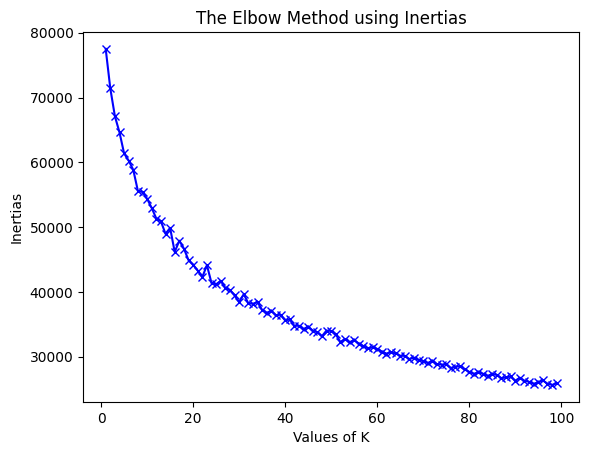

In [28]:
K_range = range(1,100)
inertias = cluster_util.elbow_for_kmean(X_glove, K_range = K_range)

import matplotlib.pyplot as plt 

plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [32]:
num_clusters = 90
res = cluster_util.cluster_kmeans(X_glove, n_clusters=num_clusters)
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(num_clusters, df2_err_ename[['evalue','cluster']])

In [33]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_km_glove"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [39]:
## dbscan

In [34]:
eps_glove = cluster_util.epsilon_search_dbscan(X_glove)
print(eps_glove)
res = cluster_util.cluster_dbscan(X_glove, eps=eps_glove, min_samples=30)

0.8913995827824888
Estimated no. of clusters: 79
Estimated no. of noise points: 7905


In [35]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [36]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_dbscan_glove"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

In [43]:
## OPTICS

In [37]:
res = cluster_util.cluster_optics(X_glove, min_samples = 30)

Estimated no. of clusters: 96
Estimated no. of noise points: 8110


C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [38]:
df2_err_ename.loc[:,"cluster"] = res
#cluster_util.print_clusters(20, df2_err_ename[['evalue','cluster']])

In [39]:
df2_err_ename = df2_err_ename.rename(columns={"cluster": "cluster_optics_glove"})
df2_err_ename.to_excel(path_file, index=False, engine='xlsxwriter')

#### evaluate vectorization and clustering methods

In [40]:
df2_err_ename.columns

Index(['fname', 'ename', 'evalue', 'evalue_tokenized', 'traceback', 'lib',
       'evalue_tokenized_transformer', 'cluster_km_tfidf',
       'cluster_dbscan_tfidf', 'cluster_optics_tfidf',
       'cluster_km_transformers', 'cluster_km_transformers1',
       'cluster_dbscan_transformers', 'cluster_dbscan_transformers1',
       'cluster_optics_transformers', 'cluster_optics_transformers1',
       'cluster_km_glove', 'cluster_dbscan_glove', 'cluster_optics_glove'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
import cluster_util

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/cluster_g_selection_valueerror'
path_file = path+"/nberror_g_cluster_valueerror.xlsx"

df2_err_ename = pd.read_excel(path_file)
with open(path+'/nberror_g_evalue_embeddings_tfidf.txt', 'rb') as f:
    X_tfidf = np.load(f)
with open(path+'/nberror_g_evalue_embeddings_transformers.txt', 'rb') as f:
    X_transformers = np.load(f)
with open(path+'/nberror_g_evalue_embeddings_transformers1.txt', 'rb') as f:
    X_transformers1 = np.load(f)
with open(path+'/nberror_g_evalue_embeddings_glove.txt', 'rb') as f:
    X_glove = np.load(f)

C:\Users\yirwa29\AppData\Local\anaconda3\envs\chatgpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
arr_eval = np.zeros((3,4))
name_cols = ['tfidf','word2vec','transformer','transformer1']
name_rows = ['kmeans','dbscan','optics']

#ss_km_tfidf
arr_eval[0,0] = cluster_util.eval_cluster_silhouette(X_tfidf, df2_err_ename['cluster_km_tfidf'])
#ss_km_glove
arr_eval[0,1] = cluster_util.eval_cluster_silhouette(X_glove, df2_err_ename['cluster_km_glove'])
#ss_km_transformers
arr_eval[0,2] = cluster_util.eval_cluster_silhouette(X_transformers, df2_err_ename['cluster_km_transformers'])
#ss_km_transformers1
arr_eval[0,3] = cluster_util.eval_cluster_silhouette(X_transformers1, df2_err_ename['cluster_km_transformers1'])

#ss_dbscan_tfidf
arr_eval[1,0] = cluster_util.eval_cluster_silhouette(X_tfidf[df2_err_ename['cluster_dbscan_tfidf']!=-1], 
                                        df2_err_ename.loc[df2_err_ename['cluster_dbscan_tfidf']!=-1, 'cluster_dbscan_tfidf'])
#ss_dbscan_glove
arr_eval[1,1] = cluster_util.eval_cluster_silhouette(X_glove[df2_err_ename['cluster_dbscan_glove']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_dbscan_glove']!=-1, 'cluster_dbscan_glove'])
#ss_dbscan_transformers
arr_eval[1,2] = cluster_util.eval_cluster_silhouette(X_transformers[df2_err_ename['cluster_dbscan_transformers']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_dbscan_transformers']!=-1, 'cluster_dbscan_transformers'])
#ss_dbscan_transformers1
arr_eval[1,3] = cluster_util.eval_cluster_silhouette(X_transformers1[df2_err_ename['cluster_dbscan_transformers1']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_dbscan_transformers1']!=-1, 'cluster_dbscan_transformers1'])
#ss_optics_tfidf
arr_eval[2,0] = cluster_util.eval_cluster_silhouette(X_tfidf[df2_err_ename['cluster_optics_tfidf']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_optics_tfidf']!=-1, 'cluster_optics_tfidf'])
#ss_optics_glove
arr_eval[2,1] = cluster_util.eval_cluster_silhouette(X_glove[df2_err_ename['cluster_optics_glove']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_optics_glove']!=-1, 'cluster_optics_glove'])
#ss_optics_transformers
arr_eval[2,2] = cluster_util.eval_cluster_silhouette(X_transformers[df2_err_ename['cluster_optics_transformers']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_optics_transformers']!=-1, 'cluster_optics_transformers'])
#ss_optics_transformers1
arr_eval[2,3] = cluster_util.eval_cluster_silhouette(X_transformers1[df2_err_ename['cluster_optics_transformers1']!=-1],
                                        df2_err_ename.loc[df2_err_ename['cluster_optics_transformers1']!=-1, 'cluster_optics_transformers1'])

In [42]:
df_eval = pd.DataFrame(arr_eval, index=name_rows, columns=name_cols)
df_eval

,tfidf,word2vec,transformer,transformer1
kmeans,0.443435,0.413491,0.436031,0.274270
dbscan,0.883814,0.909028,0.821659,0.662572
optics,0.905236,0.949811,0.922827,0.779894


In [43]:
df_eval.to_excel(path+"/nberror_g_cluster_valueerror_eval.xlsx", index=False, engine='xlsxwriter')